In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import numpy as np

Challenge 1: Exploratory Data Visualization

Description

In [26]:
diamonds = pd.read_csv('data/diamonds_train.csv')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95


In [27]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


In [35]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


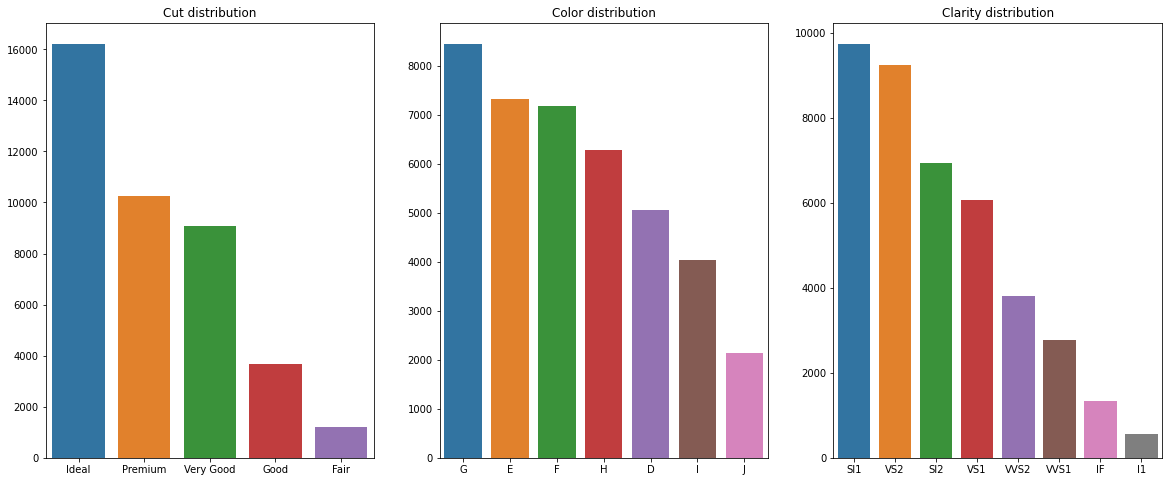

In [30]:
cut_count = diamonds['cut'].value_counts()
color_count = diamonds['color'].value_counts()
clarity_count = diamonds['clarity'].value_counts()


fig, ax = plt.subplots(1,3, figsize=(20, 8))
sns.barplot(ax=ax[0], x=cut_count.index, y=cut_count.values)
ax[0].set_title('Cut distribution')
sns.barplot(ax=ax[1], x=color_count.index, y=color_count.values)
ax[1].set_title('Color distribution')
sns.barplot(ax=ax[2], x=clarity_count.index, y=clarity_count.values)
ax[2].set_title('Clarity distribution');diamonds.info()


RelationToCategories

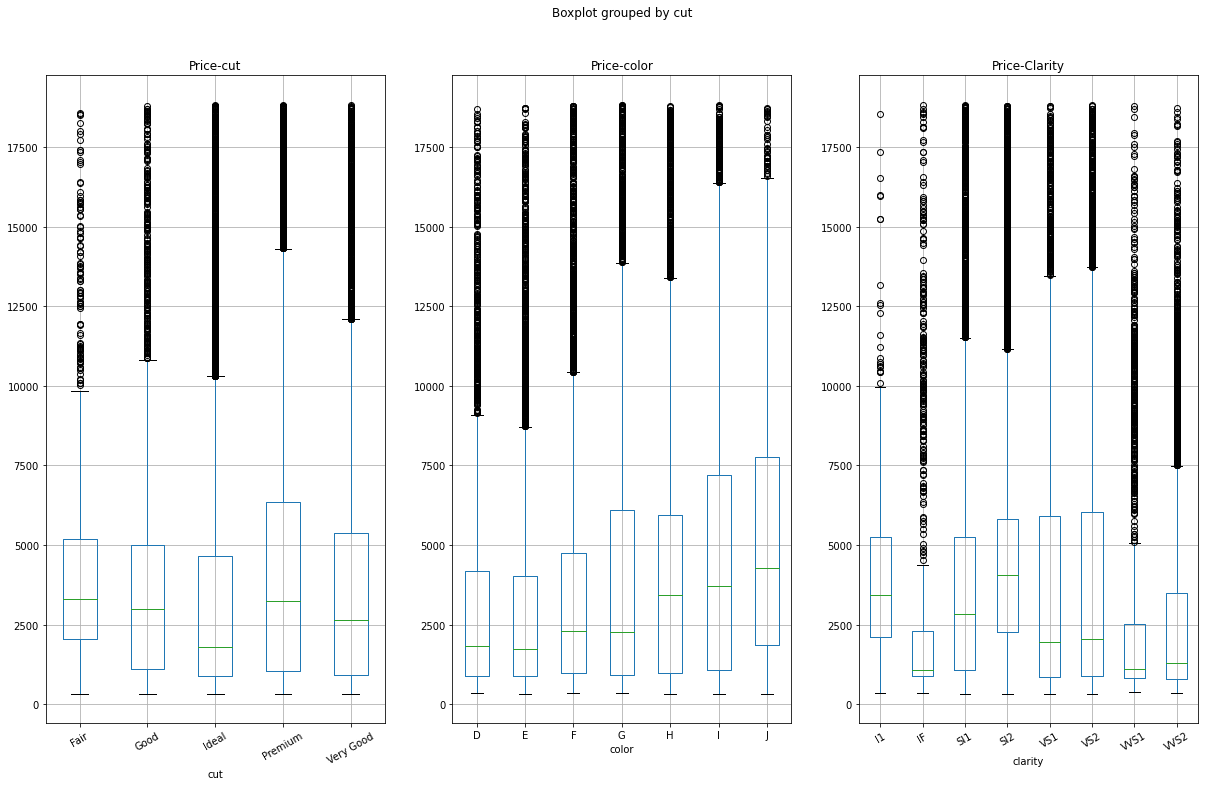

In [32]:
fig, ax = plt.subplots(1,3, figsize=(20, 12))
fig.suptitle('Boxplot categorical values and prices')
diamonds.boxplot('price','color', ax=ax[1])
ax[1].set_title('Price-color')
diamonds.boxplot('price','clarity',rot = 30, ax=ax[2])
ax[2].set_title('Price-Clarity')
diamonds.boxplot('price','cut',rot = 30, ax=ax[0])
ax[0].set_title('Price-cut');

Podemos observar que predominan los "Cortes Fair", siendo myt seguifo de los cortes "Good" y los "Ideal"

In [34]:
#Cut-Color-Price

#Debería de coger todos los diamantes, arreglar

<AxesSubplot:xlabel='cut', ylabel='price'>

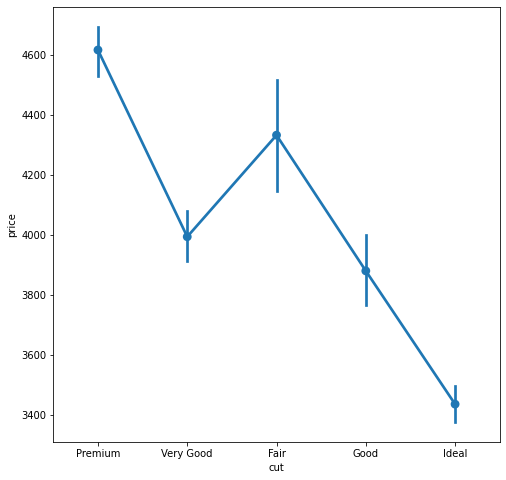

In [18]:
plt.figure(figsize=(8,8))
sns.pointplot(x="cut",y="price", cl="color", data=diamonds)

Se pretende ver una grafica con los tipos de diamantes correlacionando el precio y el corte de todos, actualmente solo consigue de forma global

In [19]:
#Claritytoprice

<AxesSubplot:xlabel='clarity', ylabel='price'>

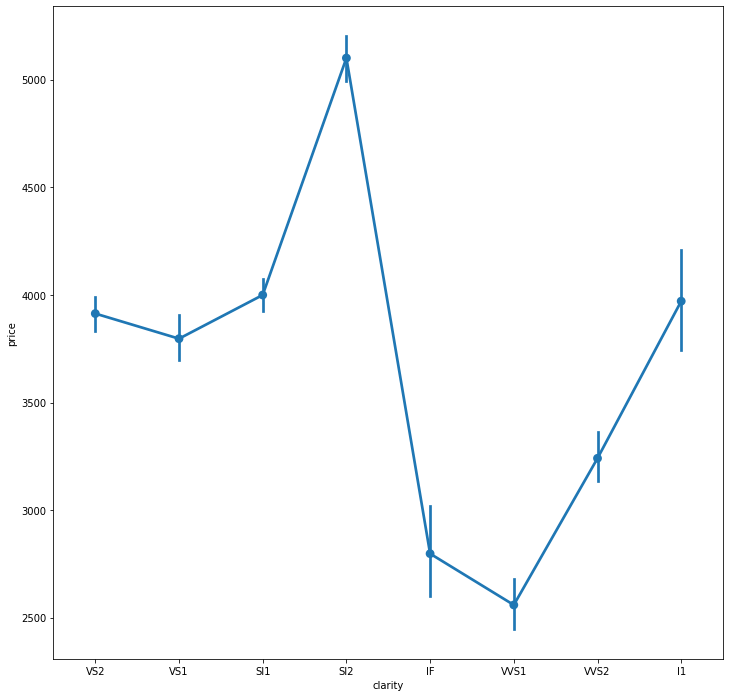

In [21]:
plt.figure(figsize=(12,12))
sns.pointplot(data=diamonds, x='clarity',y='price')

Se pretende ver una grafica con los tipos de diamantes correlacionando la claridad y el precio de todos, actualmente solo consigue de forma global

In [ ]:
#caratToPrice

<AxesSubplot:xlabel='carat', ylabel='price'>

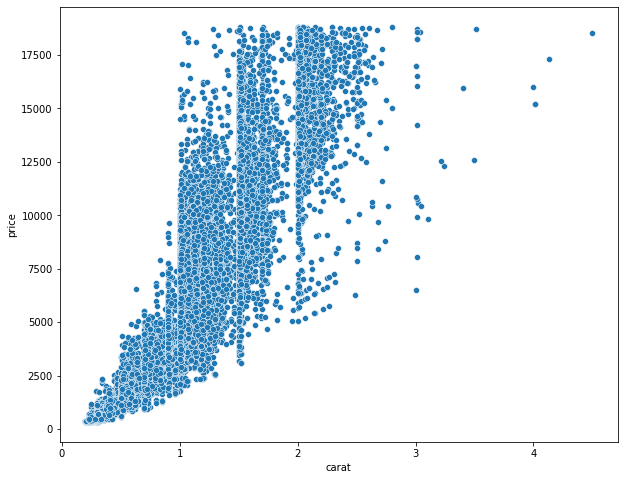

In [36]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data='diamonds', x=diamonds['carat'], y=diamonds['price'])

Este grafico de disperción nos muestra la relación de los quilates y el precio, donde vemos que a mayor quilate, mayor precio y que el mayor numero de diamamntes se agrupan entre 0,5 y 2 quialtes con un precio que sonda entre 0 y 12.500.
Como dato, el diamante de mayor cantidad de quilates se observa como el más caro y más alejado de la grafica de dispersión 

In [37]:
#ColorDescrib

In [38]:
diamonds[diamonds['color'] == 'E'].describe()

,carat,depth,table,price,x,y,z
count,7325.000000,7325.000000,7325.000000,7325.000000,7325.000000,7325.000000,7325.000000
mean,0.658835,61.659836,57.494567,3088.342526,5.413894,5.418651,3.338709
std,0.368947,1.417519,2.235462,3354.545963,0.963119,0.958256,0.593599
min,0.200000,53.300000,44.000000,326.000000,3.790000,3.750000,2.060000
25%,0.360000,60.900000,56.000000,882.000000,4.570000,4.580000,2.810000
50%,0.530000,61.800000,57.000000,1735.000000,5.230000,5.240000,3.220000
75%,0.910000,62.500000,59.000000,4026.000000,6.190000,6.190000,3.840000
max,3.050000,79.000000,73.000000,18731.000000,9.260000,9.250000,5.660000
